<a href="https://colab.research.google.com/github/MahmoudElsafi/Repositoryone/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/data sets')

In [ ]:
df = pd.read_csv('loanpredictiontrain.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df = df.astype({'CoapplicantIncome':'int'})

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df['CoapplicantIncome']=df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())

In [ ]:
#mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y


In [ ]:
df['CoapplicantIncome']=df['CoapplicantIncome']+1


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,1,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1509,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,1,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2359,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,1,141.000000,360.0,1.0,Urban,Y


In [ ]:
df['Total_Income']=df['ApplicantIncome']+ df['CoapplicantIncome']

<Axes: xlabel='Gender', ylabel='count'>

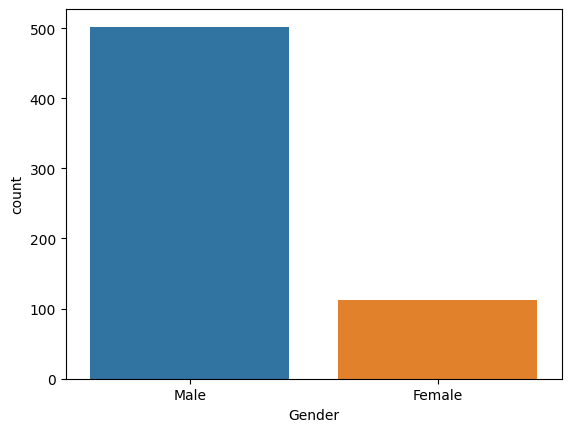

In [ ]:
sns.countplot(x=df['Gender'])

<Axes: xlabel='Married', ylabel='count'>

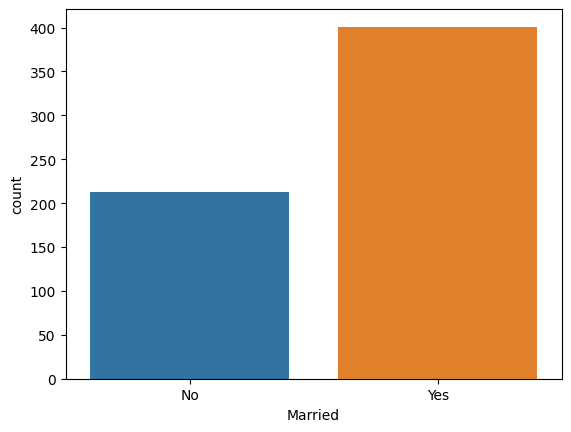

In [ ]:
sns.countplot(x=df['Married'])

<Axes: xlabel='Dependents', ylabel='count'>

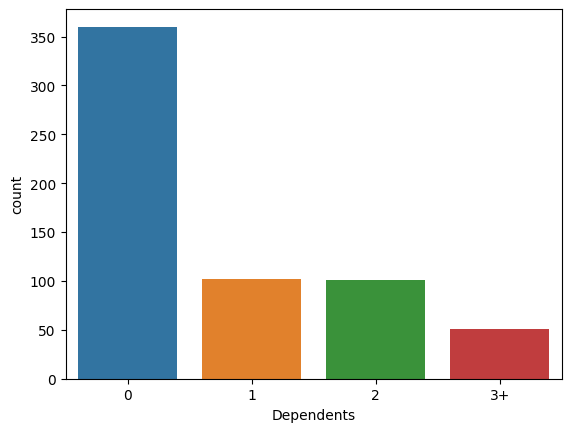

In [ ]:
sns.countplot(x=df['Dependents'])

<Axes: xlabel='Education', ylabel='count'>

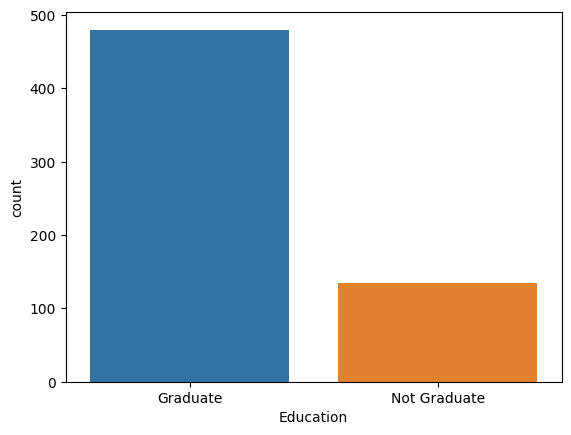

In [ ]:
sns.countplot(x=df['Education'])

<Axes: xlabel='Self_Employed', ylabel='count'>

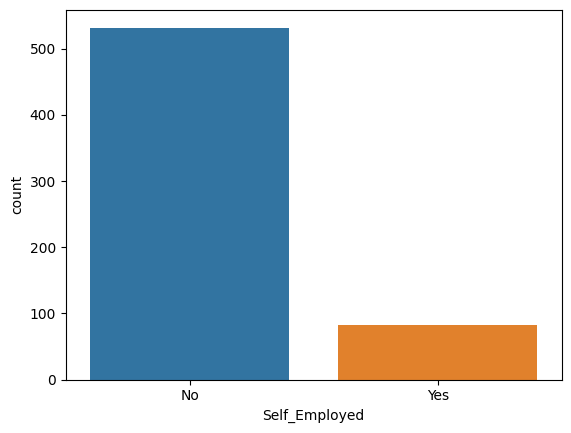

In [ ]:
sns.countplot(x=df['Self_Employed'])

<Axes: xlabel='Property_Area', ylabel='count'>

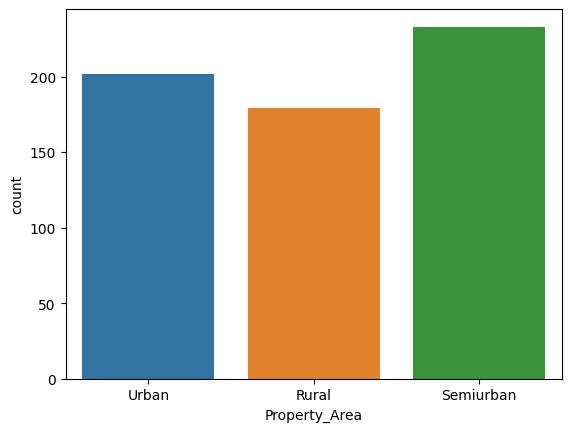

In [ ]:
sns.countplot(x=df['Property_Area'])

<Axes: xlabel='Loan_Status', ylabel='count'>

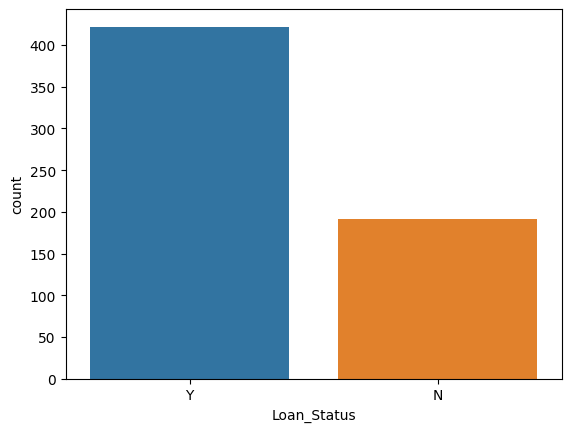

In [ ]:
sns.countplot(x=df['Loan_Status'])

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

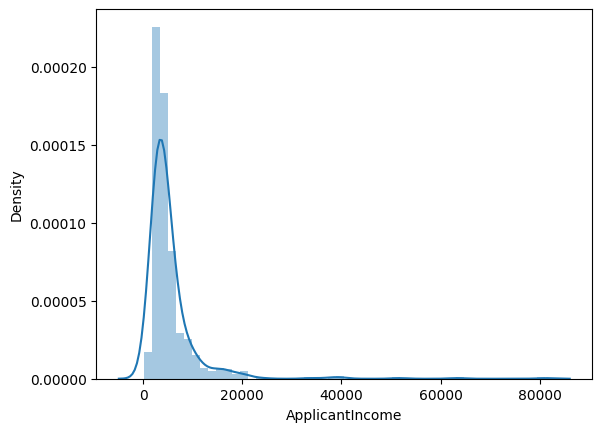

In [ ]:
sns.distplot(df['ApplicantIncome'])

In [ ]:
#log transform
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome_log', ylabel='Density'>

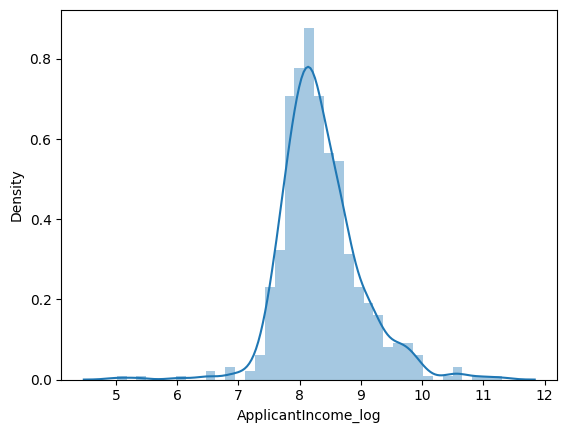

In [ ]:
sns.distplot(df['ApplicantIncome_log'])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

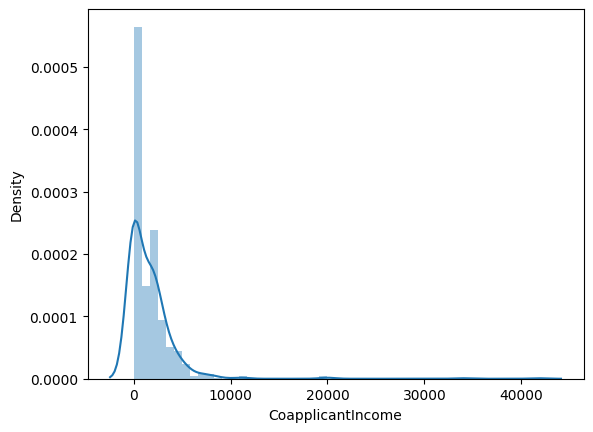

In [ ]:
sns.distplot(df['CoapplicantIncome'])

In [ ]:
df['CoapplicantIncome_log']=np.log(df['CoapplicantIncome'])

<Axes: ylabel='Density'>

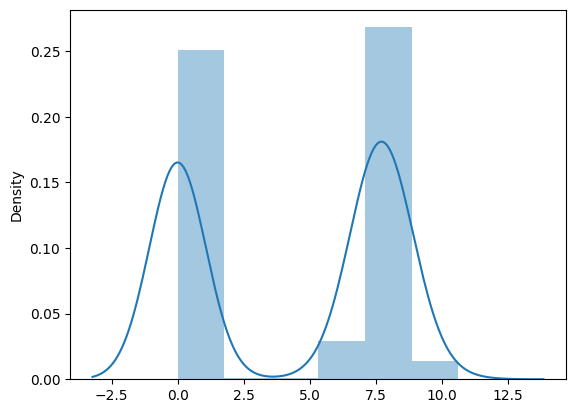

In [ ]:
sns.distplot(x=df['CoapplicantIncome_log'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

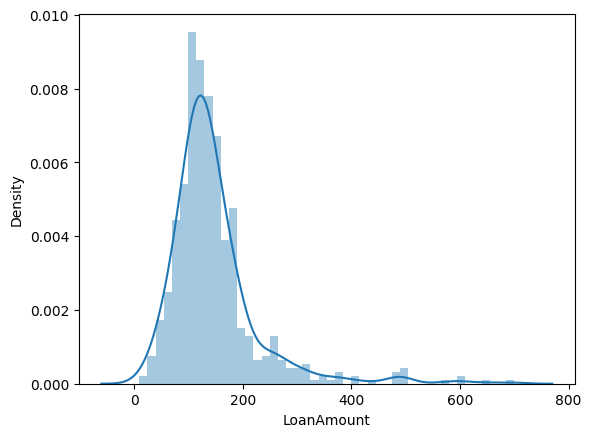

In [ ]:
sns.distplot(df['LoanAmount'])

In [ ]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

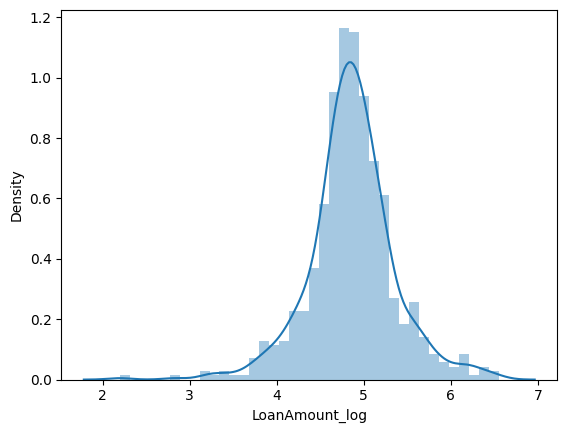

In [ ]:
sns.distplot(df['LoanAmount_log'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

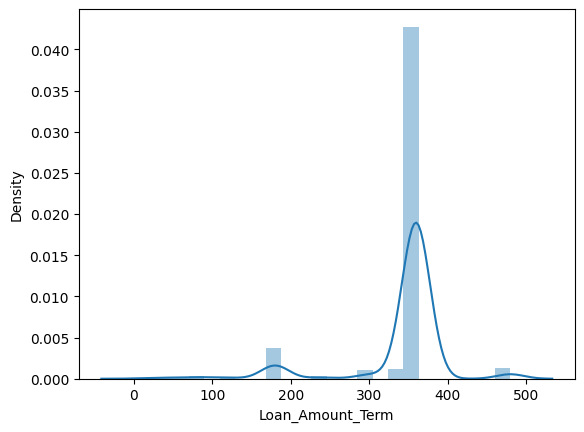

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

In [ ]:
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

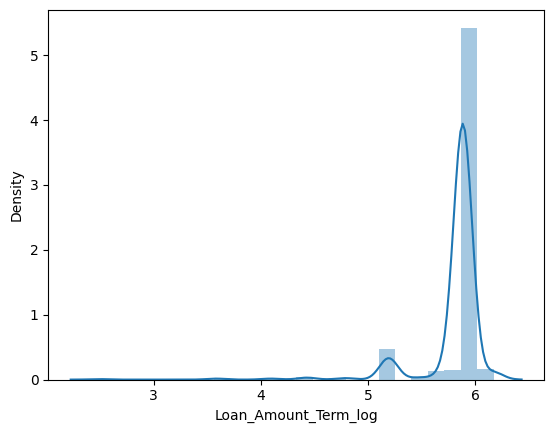

In [ ]:
sns.distplot(df['Loan_Amount_Term_log'])

<Axes: xlabel='Credit_History', ylabel='Density'>

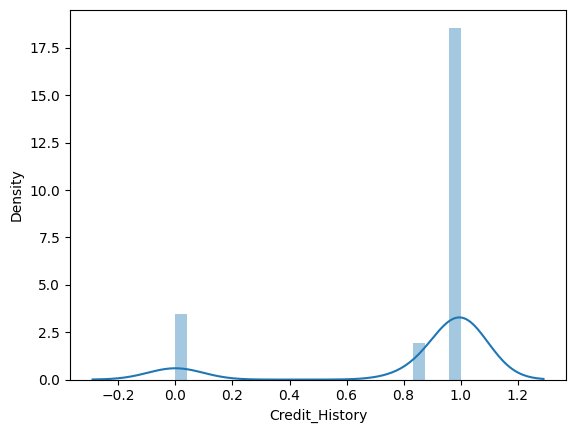

In [ ]:
sns.distplot(df['Credit_History'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

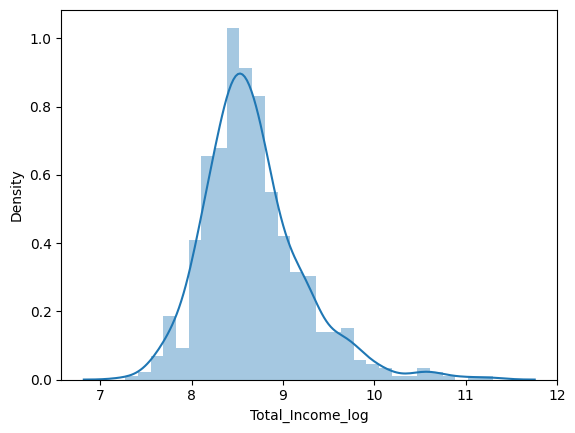

In [ ]:
df['Total_Income_log']=np.log(df['Total_Income'])
sns.distplot(df['Total_Income_log'])

<Axes: >

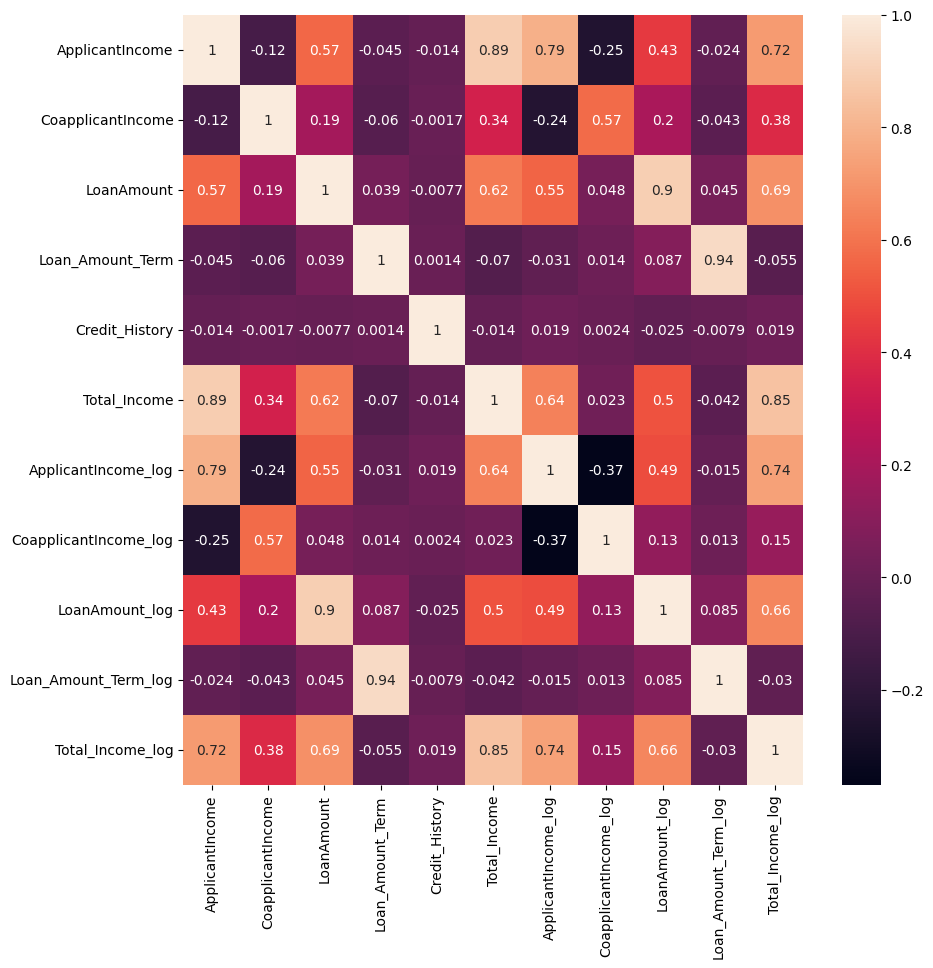

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [ ]:
#dropping columns
cols=['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount','Total_Income','Loan_ID','CoapplicantIncome_log']
df=df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699681


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Self_Employed','Education', 'Loan_Status','Property_Area','Dependents']
le = LabelEncoder()
for col in cols:
  df[col]= le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674197
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714732
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006701
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505525
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699681


In [ ]:
#Train,Test split
X=df.drop(columns=['Loan_Status'],axis=0)
Y=df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
#model training
#classify function
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
  x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
  model.fit(x_train,y_train)
  print('Accuracy is:',model.score(x_test,y_test)*100)
  #Cross validation
  score = cross_val_score(model,x,y,cv=5)
  print('cross validation is',np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,Y)

Accuracy is: 77.27272727272727
cross validation is 80.9462881514061


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,Y)

Accuracy is: 71.42857142857143
cross validation is 70.52912168465946


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,Y)

Accuracy is: 77.27272727272727
cross validation is 78.18072770891644


In [ ]:
model = ExtraTreesClassifier()
classify(model,X,Y)

Accuracy is: 73.37662337662337
cross validation is 76.38944422231107


In [ ]:
#HYPER PARAMETER TURNING
model = RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
classify(model,X,Y)

Accuracy is: 75.97402597402598
cross validation is 80.29454884712781


In [ ]:
#confusion matrix
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm= confusion_matrix(y_test,y_pred)
cm

array([[24, 30],
       [ 4, 96]])

<Axes: >

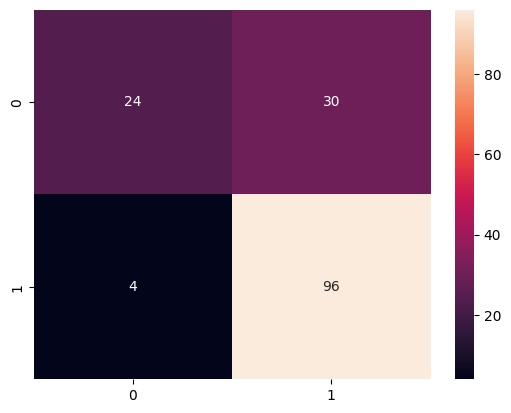

In [ ]:
sns.heatmap(cm,annot=True)